<a href="https://colab.research.google.com/github/alaazarour/project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
#import all the required libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [96]:
import pandas as pd
import io
from google.colab import files
uploded= files.upload()
df=pd.read_csv(io.BytesIO(uploded['udemy_courses.csv']))
df

Saving udemy_courses.csv to udemy_courses (3).csv


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [97]:
#number of rows and columns in our datasets.
df.shape

(3678, 12)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


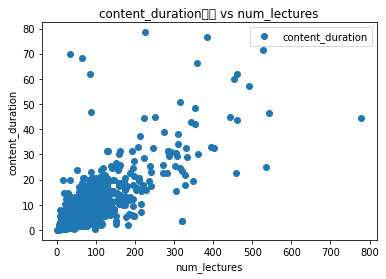

In [98]:
#plot our data points on a 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data using the below sc
df.plot( x='num_lectures',y='content_duration', style='o')  
plt.title('content_duration		 vs num_lectures')  
plt.ylabel('content_duration')  
plt.xlabel('num_lectures')  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


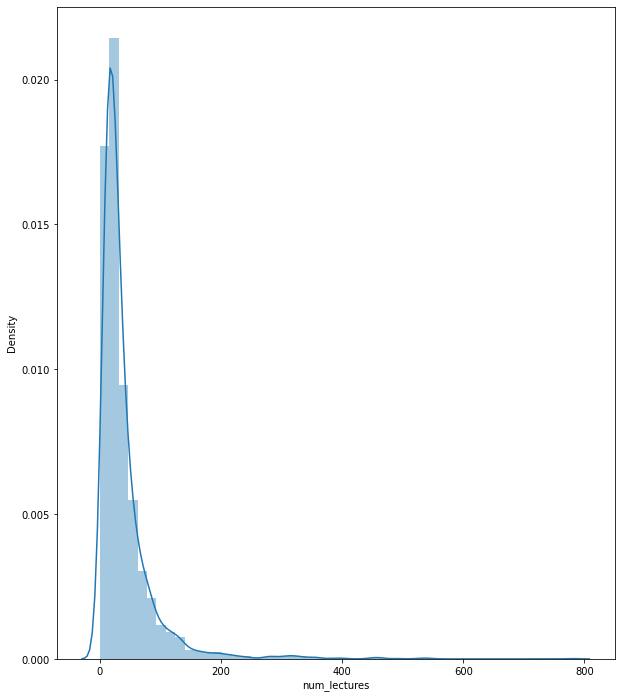

In [99]:
#price and once we plot it we can observe that the Average price  is Between Nearly 10 and 12.
plt.figure(figsize=(10,12))
plt.tight_layout()
seabornInstance.distplot(df['num_lectures'])

In [101]:
X = df['content_duration'].values.reshape(-1,1)
y = df['num_lectures'].values.reshape(-1,1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [103]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)


[12.95627839]
[[6.60218362]]


In [106]:
y_pred = regressor.predict(X_test)

In [107]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,58,52.569380
1,19,26.160646
2,9,19.558462
3,20,17.137661
4,19,26.160646
...,...,...
363,19,22.859554
364,10,19.558462
365,9,19.558462
366,29,36.063921


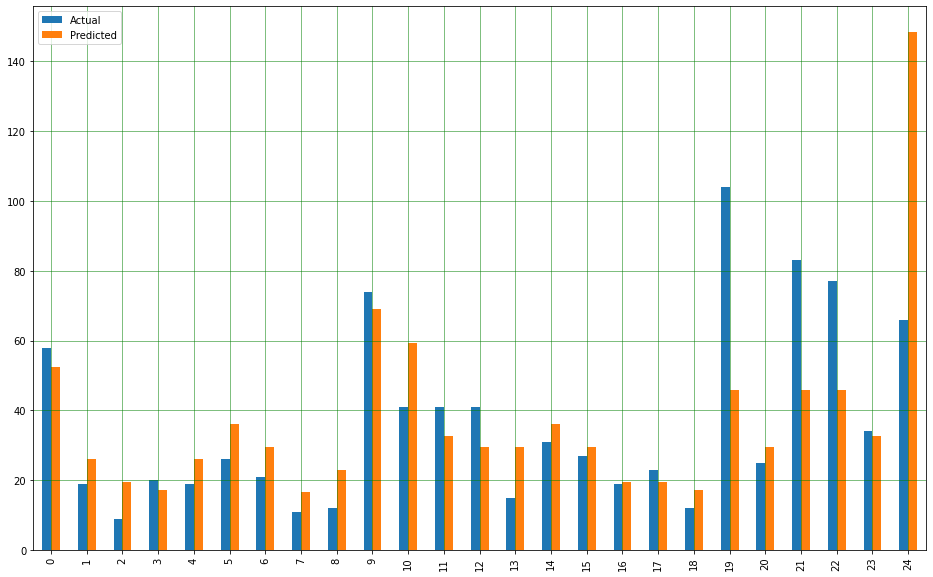

In [108]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

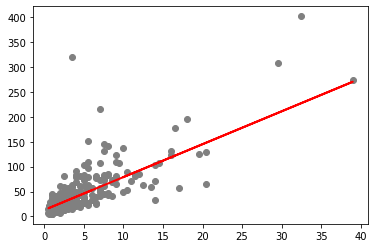

In [111]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()